# Use Case Business Analytics E-commerce company 

A Portuguese e-commerce company that sells electronic devices wants to extract business knowledge from data representing sales and product deliveries. Especially important is to develop models to:  
1. Predict if the product reach on time and also 
2. To predict next week total costs using the total costs of the previous two weeks. 

# CRISP-DM Methodology 

In [1]:
#importar as principais livrarias 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Modelo de Previsão on_Time

In [2]:
#extrair os dados
df = pd.read_csv('base_dados.csv')

Primeiro vou separar as feature columns da target column, além disso, também vou eliminar a coluna id porque ela simplesmente nomeia as encomendas/clientes. 

In [3]:
# Let's do a copy in order to preseve the df dataset in memory and saved from inplace operations
X = df.copy(deep=True)

In [4]:
# Let's remove passenger id, and consider be moved -1
X = X.drop("id", axis=1)

In [5]:
X

,Unnamed: 0,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,0,F,Ship,3,2,234,3,medium,M,39,2099,2,1,0
1,1,D,Ship,3,4,122,3,high,F,15,1354,2,1,0
2,2,F,Ship,3,3,135,3,low,M,8,1074,2,1,0
3,3,A,Ship,3,5,103,3,low,M,3,1403,2,1,0
4,4,B,Ship,3,5,257,3,medium,F,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,9639,A,Flight,4,1,204,3,medium,M,3,4310,6,27,1
9640,9640,B,Flight,3,1,199,3,high,M,3,5127,6,27,1
9641,9641,C,Flight,3,4,216,3,low,F,3,5149,6,27,1
9642,9642,F,Flight,4,3,183,3,low,F,6,5712,6,27,0


In [6]:
# If we analyse some of the features with the predict label 
X[['warehouse', 'on_Time']].groupby(['warehouse'], as_index=False).mean().sort_values(by='on_Time', ascending=False)

,warehouse,on_Time
0,A,0.413192
4,F,0.400933
2,C,0.400747
3,D,0.399876
1,B,0.394524


Pode-se constatar que todos os armazéns têm uma taxa de entrega a tempo semelhante. 

In [7]:
X[['shipment', 'on_Time']].groupby(['shipment'], as_index=False).mean().sort_values(by='on_Time', ascending=False)

,shipment,on_Time
1,Road,0.411652
2,Ship,0.401746
0,Flight,0.391500


Todos os meios de transporte têm uma taxa de entrega semelhante. 

In [8]:
X[['number_customer_calls', 'on_Time']].groupby(['number_customer_calls'], as_index=False).mean().sort_values(by='on_Time', ascending=False)

,number_customer_calls,on_Time
4,6,0.481714
5,7,0.475000
3,5,0.402736
2,4,0.400065
0,2,0.384016
1,3,0.373176


Quem faz mais chamadas tem mais chances que a encomenda chegue a tempo. 

In [9]:
X[['number_prior_purchases', 'on_Time']].groupby(['number_prior_purchases'], as_index=False).mean().sort_values(by='on_Time', ascending=False)

,number_prior_purchases,on_Time
3,5,0.485770
2,4,0.457696
4,6,0.426696
7,10,0.411392
0,2,0.373876
1,3,0.364267
6,8,0.360656
5,7,0.333333


In [10]:
X[['product_importance', 'on_Time']].groupby(['product_importance'], as_index=False).mean().sort_values(by='on_Time', ascending=False)

,product_importance,on_Time
2,medium,0.407434
1,low,0.404803
0,high,0.356808


In [11]:
X[['gender', 'on_Time']].groupby(['gender'], as_index=False).mean().sort_values(by='on_Time', ascending=False)

,gender,on_Time
0,F,0.403415
1,M,0.399958


In [12]:
X[['weekday_of_purchase', 'on_Time']].groupby(['weekday_of_purchase'], as_index=False).mean().sort_values(by='on_Time', ascending=False)

,weekday_of_purchase,on_Time
3,5,0.468851
4,6,0.437927
2,4,0.395233
1,3,0.291849
0,2,0.270341


Pode-se constatar que entregas de 4ª, 5ª e 6ªas têm maior chance de chegar a tempo que as entregas feitas nas 2ª e 3ª-feira.

In [13]:
X[['week_of_purchase', 'on_Time']].groupby(['week_of_purchase'], as_index=False).mean().sort_values(by='on_Time', ascending=False)

,week_of_purchase,on_Time
21,22,0.626609
25,26,0.610738
23,24,0.585507
26,27,0.576923
10,11,0.576923
11,12,0.575845
24,25,0.573574
16,17,0.571429
12,13,0.564565
17,18,0.561353


Constata-se que as enteregas das semanas 1 até 8 não chegaram a tempo. 

IndexError: index 8 is out of bounds for axis 0 with size 8

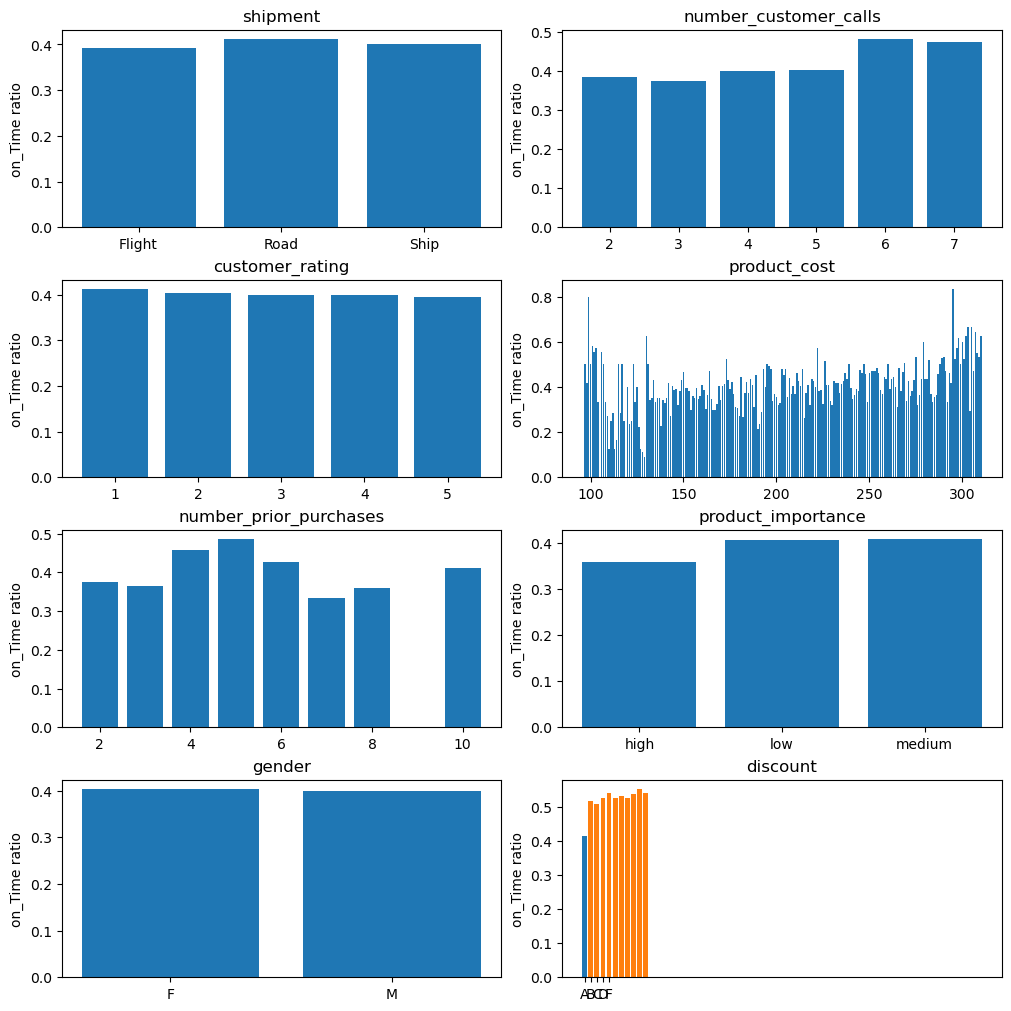

In [14]:
# Vamos comparar as features com a feature target:
fig, axs = plt.subplots(4, 2, figsize=(10, 10), constrained_layout=True)

for i, col in enumerate(X.columns[1:]):
    sub_cols = [col, "on_Time"]

    data = X[sub_cols].groupby([col], as_index=False).mean()

    axs.flat[i-1].bar(data[col], data["on_Time"])
    axs.flat[i-1].set_title(col)
    axs.flat[i-1].set_ylabel("on_Time ratio")

Todos os armazéns têm uma distribuição bastante constante, assim como o tipo de transporte de envio das encomendas. É curioso que o product_importante não tem qualquer contribuição na urgência do envio da encomenda porque as encomendas com produtos mais importantes são as que têm menor racio de on_Time. 

## Encode categorical variables 

In [15]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Unnamed: 0              9644 non-null   int64 
 1   warehouse               9644 non-null   object
 2   shipment                9644 non-null   object
 3   number_customer_calls   9644 non-null   int64 
 4   customer_rating         9644 non-null   int64 
 5   product_cost            9644 non-null   int64 
 6   number_prior_purchases  9644 non-null   int64 
 7   product_importance      9644 non-null   object
 8   gender                  9644 non-null   object
 9   discount                9644 non-null   int64 
 10  weight                  9644 non-null   int64 
 11  weekday_of_purchase     9644 non-null   int64 
 12  week_of_purchase        9644 non-null   int64 
 13  on_Time                 9644 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 1.0+ MB


In [16]:
#feature warehouse - variáveis únicas 
X.loc[:, "warehouse"].unique()

array(['F', 'D', 'A', 'B', 'C'], dtype=object)

In [17]:
#encode categorical variables to numerical variables 
warehouse_map = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6}
X.loc[:, "warehouse"] = X.loc[:, "warehouse"].apply(lambda x: warehouse_map[x] )

In [18]:
#feature shipment - variáveis únicas 
X.loc[:, "shipment"].unique()

array(['Ship', 'Road', 'Flight'], dtype=object)

In [19]:
#encode categorical variables to numerical variables 
shipment_map = {"Ship": 1, "Road": 2, "Flight": 3}
X.loc[:, "shipment"] = X.loc[:, "shipment"].apply(lambda x: shipment_map[x] )

In [20]:
#product importance - variáveis únicas
X.loc[:, "product_importance"].unique()

array(['medium', 'high', 'low'], dtype=object)

In [21]:
#encode categorical variables to numerical variables 
produc_importance_map = {"low": 1, "medium": 2, "high": 3}
X.loc[:, "product_importance"] = X.loc[:, "product_importance"].apply(lambda x: produc_importance_map[x] )

In [22]:
#gender - variáveis únicas
X.loc[:, "gender"].unique()

array(['M', 'F'], dtype=object)

In [23]:
#encode categorical variables to numerical variables 
gender_map = {"M": 0, "F": 1}
X.loc[:, "gender"] = X.loc[:, "gender"].apply(lambda x: gender_map[x] )

In [24]:
#verificação
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              9644 non-null   int64
 1   warehouse               9644 non-null   int64
 2   shipment                9644 non-null   int64
 3   number_customer_calls   9644 non-null   int64
 4   customer_rating         9644 non-null   int64
 5   product_cost            9644 non-null   int64
 6   number_prior_purchases  9644 non-null   int64
 7   product_importance      9644 non-null   int64
 8   gender                  9644 non-null   int64
 9   discount                9644 non-null   int64
 10  weight                  9644 non-null   int64
 11  weekday_of_purchase     9644 non-null   int64
 12  week_of_purchase        9644 non-null   int64
 13  on_Time                 9644 non-null   int64
dtypes: int64(14)
memory usage: 1.0 MB


In [25]:
X

,Unnamed: 0,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,0,6,1,3,2,234,3,2,0,39,2099,2,1,0
1,1,4,1,3,4,122,3,3,1,15,1354,2,1,0
2,2,6,1,3,3,135,3,1,0,8,1074,2,1,0
3,3,1,1,3,5,103,3,1,0,3,1403,2,1,0
4,4,2,1,3,5,257,3,2,1,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,9639,1,3,4,1,204,3,2,0,3,4310,6,27,1
9640,9640,2,3,3,1,199,3,3,0,3,5127,6,27,1
9641,9641,3,3,3,4,216,3,1,1,3,5149,6,27,1
9642,9642,6,3,4,3,183,3,1,1,6,5712,6,27,0


In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Unnamed: 0              9644 non-null   int64
 1   warehouse               9644 non-null   int64
 2   shipment                9644 non-null   int64
 3   number_customer_calls   9644 non-null   int64
 4   customer_rating         9644 non-null   int64
 5   product_cost            9644 non-null   int64
 6   number_prior_purchases  9644 non-null   int64
 7   product_importance      9644 non-null   int64
 8   gender                  9644 non-null   int64
 9   discount                9644 non-null   int64
 10  weight                  9644 non-null   int64
 11  weekday_of_purchase     9644 non-null   int64
 12  week_of_purchase        9644 non-null   int64
 13  on_Time                 9644 non-null   int64
dtypes: int64(14)
memory usage: 1.0 MB


In [27]:
X = X.drop(columns =['Unnamed: 0'])

In [28]:
# convert categorical to integer
#Nomear as colunas do tipo category 
columns_int = [['warehouse'], ['shipment'], ['product_importance'], ['gender']]

In [29]:
#Replace Data Types to Integer
for column in columns_int: 
    X[column] = X[column].astype('int')

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   warehouse               9644 non-null   int32
 1   shipment                9644 non-null   int32
 2   number_customer_calls   9644 non-null   int64
 3   customer_rating         9644 non-null   int64
 4   product_cost            9644 non-null   int64
 5   number_prior_purchases  9644 non-null   int64
 6   product_importance      9644 non-null   int32
 7   gender                  9644 non-null   int32
 8   discount                9644 non-null   int64
 9   weight                  9644 non-null   int64
 10  weekday_of_purchase     9644 non-null   int64
 11  week_of_purchase        9644 non-null   int64
 12  on_Time                 9644 non-null   int64
dtypes: int32(4), int64(9)
memory usage: 828.9 KB


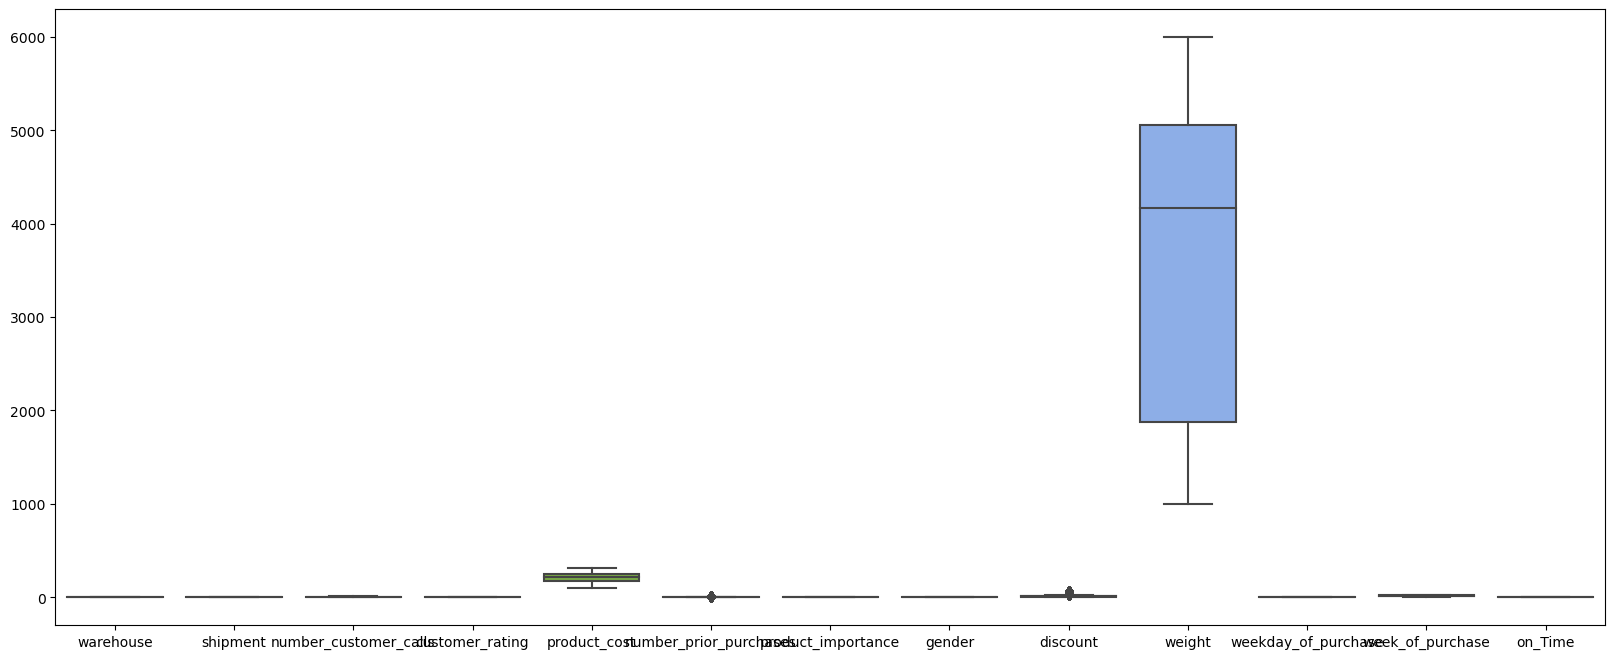

In [31]:
# looking for outliers using box plot
import seaborn as sns
plt.figure(figsize = (20, 8))
sns.boxplot(data = X, width = 0.8)
plt.show()

In [32]:
X

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,6,1,3,2,234,3,2,0,39,2099,2,1,0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0
2,6,1,3,3,135,3,1,0,8,1074,2,1,0
3,1,1,3,5,103,3,1,0,3,1403,2,1,0
4,2,1,3,5,257,3,2,1,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0


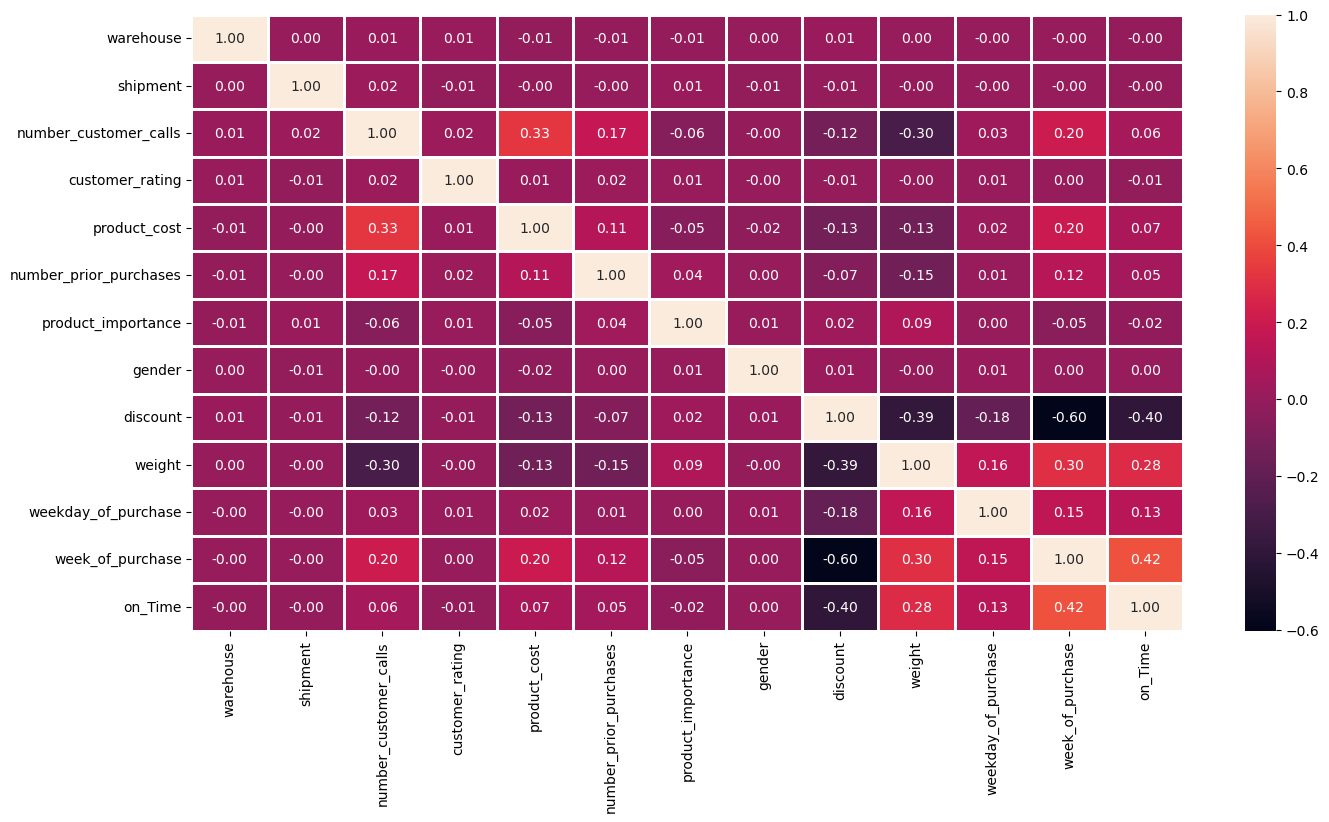

In [33]:
# Heatmap
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(X.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

As 4 variáveis que têm maior correlação com a target feature são: "discount", "weight", "weekday of purchase" e "week of purchase". 

In [34]:
X

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,6,1,3,2,234,3,2,0,39,2099,2,1,0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0
2,6,1,3,3,135,3,1,0,8,1074,2,1,0
3,1,1,3,5,103,3,1,0,3,1403,2,1,0
4,2,1,3,5,257,3,2,1,19,2173,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0


In [35]:
# Let's seperate the dataset
y = X[["on_Time"]] 

In [36]:
df = X

Target feature

In [37]:
y['on_Time'].value_counts()

0    5770
1    3874
Name: on_Time, dtype: int64

In [38]:
y

,on_Time
0,0
1,0
2,0
3,0
4,0
...,...
9639,1
9640,1
9641,1
9642,0


[Text(0, 0, '5770'), Text(0, 0, '3874')]

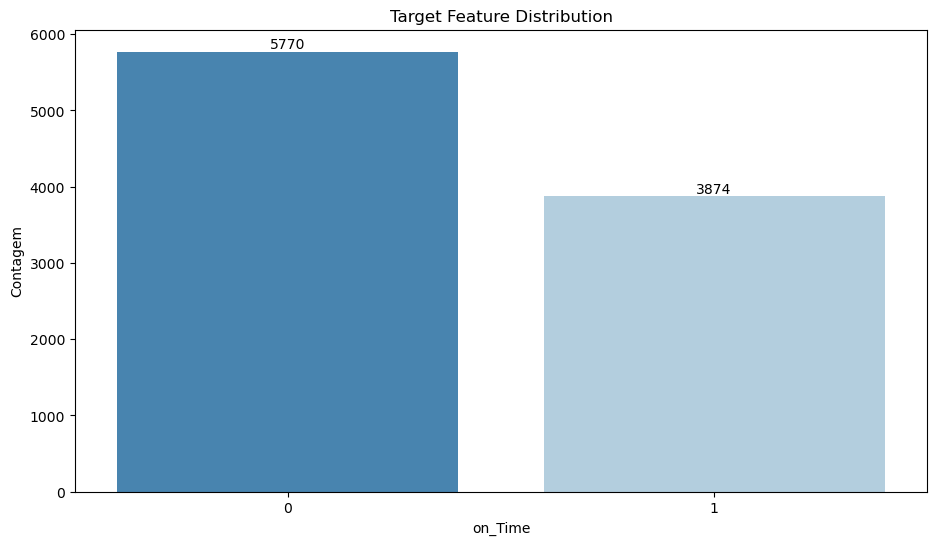

In [39]:
#on_Time count-plot
plt.figure(figsize =(11, 6))
a = sns.countplot(x= y['on_Time'], order = y['on_Time'].value_counts().index,
                  palette = 'Blues_r')

plt.title('Target Feature Distribution')
plt.xlabel("on_Time")
plt.ylabel("Contagem")

a.bar_label(a.containers[0])

Considero que está balanceado. 

In [40]:
# For the outliers, lets apply a StandardScalar 
from sklearn.preprocessing import MinMaxScaler

minMax = MinMaxScaler()

## Feature Selection

In [41]:
X = X[['discount','weight', 'weekday_of_purchase', 'week_of_purchase', 'on_Time']]

In [42]:
X

,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
0,39,2099,2,1,0
1,15,1354,2,1,0
2,8,1074,2,1,0
3,3,1403,2,1,0
4,19,2173,2,1,0
...,...,...,...,...,...
9639,3,4310,6,27,1
9640,3,5127,6,27,1
9641,3,5149,6,27,1
9642,6,5712,6,27,0


## Split data into train and test

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
#Vamos separar em 80(teste)-20(treino): optamos por 80-20 e não 70-30 porque o dataset é considerado pequeno (de algumas centenas a algumas dezenas de milhares de dados)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 1)

In [45]:
X_train

,discount,weight,weekday_of_purchase,week_of_purchase,on_Time
9381,4,5610,6,25,1
2571,15,1181,6,7,0
2351,41,1140,2,7,0
5723,5,5790,4,17,1
112,41,3973,3,1,0
...,...,...,...,...,...
2895,1,5043,4,9,0
7813,5,4560,5,22,0
905,63,1387,3,4,0
5192,5,4369,4,15,1


In [46]:
y_train

,on_Time
9381,1
2571,0
2351,0
5723,1
112,0
...,...
2895,0
7813,0
905,0
5192,1


In [47]:
X_test1 = X_test
X_train1 = X_train

In [48]:
#remover a target feature
X = X.drop("on_Time", axis=1)
X_test = X_test.drop("on_Time", axis=1)
X_train = X_train.drop("on_Time", axis=1)

In [49]:
X_test

,discount,weight,weekday_of_purchase,week_of_purchase
229,49,2581,5,1
2835,4,1991,3,9
7773,2,5741,5,22
9450,10,5883,6,25
574,15,1956,3,3
...,...,...,...,...
7518,3,5866,4,21
9359,2,5632,6,25
9241,9,5136,5,25
8254,10,1027,4,24


In [50]:
X_train

,discount,weight,weekday_of_purchase,week_of_purchase
9381,4,5610,6,25
2571,15,1181,6,7
2351,41,1140,2,7
5723,5,5790,4,17
112,41,3973,3,1
...,...,...,...,...
2895,1,5043,4,9
7813,5,4560,5,22
905,63,1387,3,4
5192,5,4369,4,15


## Normalização das features com técnica minMax

In [51]:
X_test = minMax.fit_transform(X_test)
X_train = minMax.fit_transform(X_train)

In [52]:
#renomear as colunas para facilitar leitura 
X_test = pd.DataFrame(X_test).rename(columns={
    0: "discount",
    1: "weight", 
    2: "weekday_of_purchase",
    3: "week_of_purchase",
})

In [53]:
#renomear as colunas para facilitar leitura 
X_train = pd.DataFrame(X_train).rename(columns={
    0: "discount",
    1: "weight", 
    2: "weekday_of_purchase",
    3: "week_of_purchase",
})

In [54]:
#Let's just confirm that  the data is normaly distributed - mean 0 and std 1
pd.DataFrame(X_test).describe()

,discount,weight,weekday_of_purchase,week_of_purchase
count,1929.000000,1929.000000,1929.000000,1929.000000
mean,0.199083,0.533514,0.616511,0.491925
std,0.258831,0.324209,0.332870,0.281556
min,0.000000,0.000000,0.000000,0.000000
25%,0.046875,0.179487,0.500000,0.230769
50%,0.093750,0.633614,0.750000,0.461538
75%,0.140625,0.815705,1.000000,0.730769
max,1.000000,1.000000,1.000000,1.000000


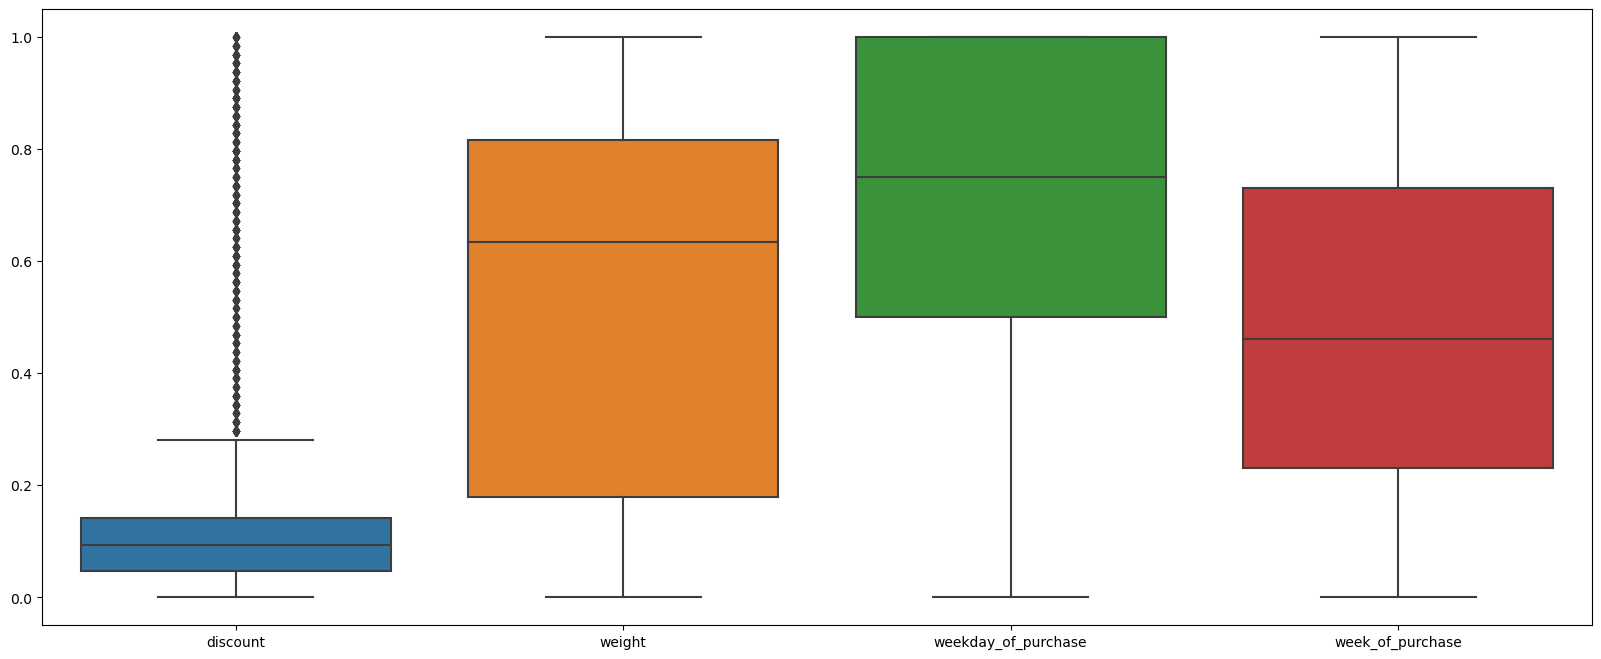

In [55]:
# looking for outliers using box plot
import seaborn as sns
plt.figure(figsize = (20, 8))
sns.boxplot(data = X_test, width = 0.8)
plt.show()

# Decision Tree 

In [56]:
from sklearn import tree
DTclf = tree.DecisionTreeClassifier()

In [57]:
#treinar o modelo com os dados de treino 
DTclf = DTclf.fit(X_train,y_train)

In [58]:
#executar previsões
y_predDT = DTclf.predict(X_test)

In [59]:
#temos duas colunas de hipóteses 0:desiste e 1: não desiste e o que é calculado é a percentagem de certeza
DTclf.predict_proba(X_test) 

array([[1., 0.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

<AxesSubplot:>

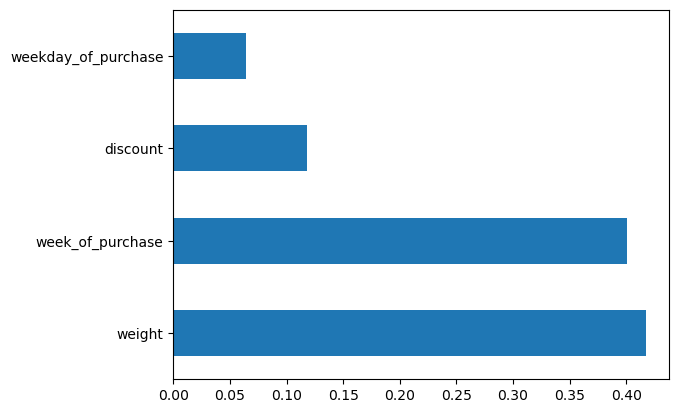

In [60]:
#features importance 
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(1000)
   .plot(kind='barh'))   

## Performance do Modelo - Confusion Matrix 

In [61]:
from sklearn.metrics import confusion_matrix

In [62]:
#Verificar a accuracy
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.67


In [63]:
confusion_matrix(y_true=y_test, y_pred=y_predDT)

array([[864, 311],
       [329, 425]], dtype=int64)

In [64]:
tn, fp, fn, tp =confusion_matrix(y_true=y_test, y_pred=y_predDT).ravel()

In [65]:
# accuracy = (tp + tn)  / (tn + fp + fn + tp)
(tp + tn)  / (tn + fp + fn + tp)

0.6682218766200103

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

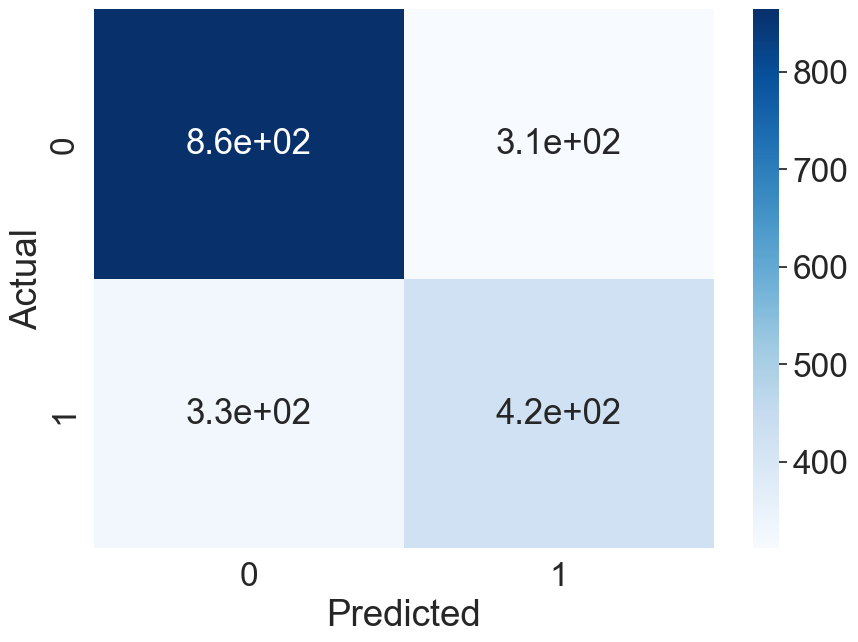

In [66]:
import seaborn as sn
#confusion matrix
data = confusion_matrix(y_test, y_predDT)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=2.2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 25})# font size

In [67]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predDT))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1175
           1       0.58      0.56      0.57       754

    accuracy                           0.67      1929
   macro avg       0.65      0.65      0.65      1929
weighted avg       0.67      0.67      0.67      1929



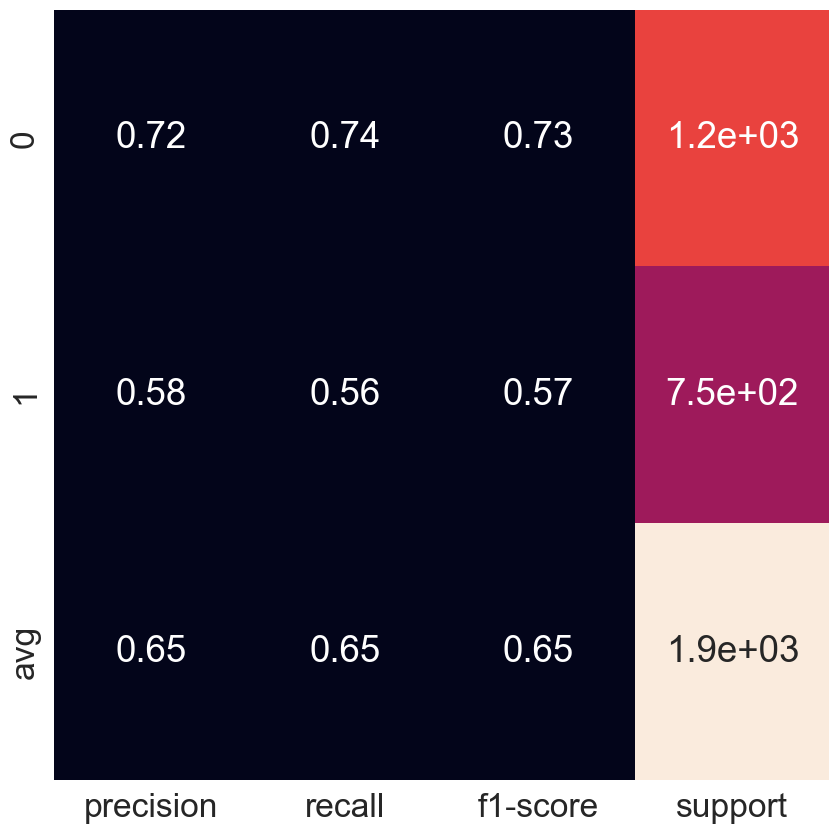

In [68]:
# gráfico com métricas de avaliação do modelo 
from sklearn.metrics import precision_recall_fscore_support
def plot_classification_report(y_test, y_predDT, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_test))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_test, y_predDT)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

plot_classification_report(y_test, y_predDT)

## K-Fold validation - prevent overfitting 

In [69]:
from sklearn.model_selection import KFold 
k = 5
kf = KFold(n_splits=k, random_state=None)

In [70]:
y

,on_Time
0,0
1,0
2,0
3,0
4,0
...,...
9639,1
9640,1
9641,1
9642,0


In [71]:
# let's compute accury using scikit learn
from sklearn.metrics import accuracy_score

In [72]:
acc_score = []
 
for train_index , test_index in kf.split(X):
    
    X_train_fold , X_test_fold = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train_fold , y_test_fold = y.iloc[train_index] , y.iloc[test_index]
     
    DTclf.fit(X_train_fold,y_train_fold)
    pred_values = DTclf.predict(X_test_fold)
     
    acc = accuracy_score(pred_values , y_test_fold)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k

In [73]:
#consideramos o resultado satisfatório quando voltamos a correr e o resultado não varia muito. 0,1 já é variar muito. 
avg_acc_score 

0.6416278401941109

## ROC Curve

In [74]:
# Let's also compute the ROC curve for the current model we have
from sklearn.metrics import roc_curve, auc

In [75]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_predDT, pos_label=1)

In [76]:
AUC = auc(fpr, tpr)

Temos 2 coisas que se deve reparar no AUC, se a linha está acima da reta e quanto mais próximo do quadrante superior esquerdo estiver

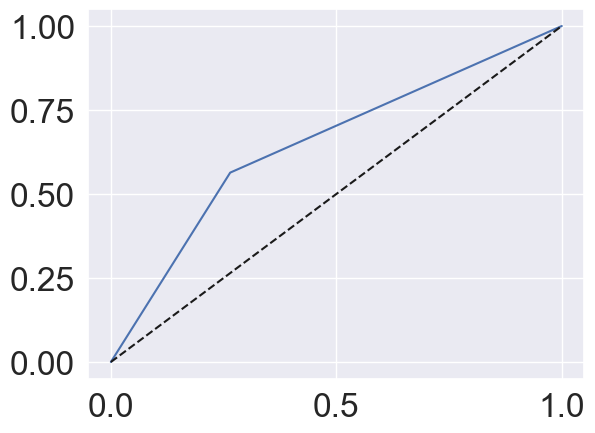

AUC: 0.6494898131948756


In [77]:
#gráfico para ver a curva ROC e a accuracy da DT

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_predDT, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show() 


# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

## Grid-Search

In [78]:
# Most common parameters
MAX_DEPTH = [2, 4, 6, 8]
MIN_SAMPLE_SPLIT = [2, 4, 6, 8]
MAX_FEATURES = [1, 2, 4, 6]

In [79]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':MAX_DEPTH, 'min_samples_split':MIN_SAMPLE_SPLIT, "max_features":MAX_FEATURES}

In [80]:
#cv = cross validation - tipo k-fold
clf = GridSearchCV(DTclf, parameters, cv=5, scoring="roc_auc")

In [81]:
clf.fit(X, y)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\olive\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\olive\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\olive\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in (0

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='roc_auc')

### Find best parameters

In [82]:
# check best params
clf.best_params_

{'max_depth': 2, 'max_features': 2, 'min_samples_split': 6}

In [83]:
clf.best_score_

0.7214810031219532

In [84]:
best_model = clf.best_estimator_

In [85]:
# Como o nosso modelo só exige 3 features temos que as selecionar
best_model.feature_importances_

array([0., 0., 0., 1.])

In [86]:
#para saber quais são as colunas
X.columns 

Index(['discount', 'weight', 'weekday_of_purchase', 'week_of_purchase'], dtype='object')

In [87]:
# lets make predictions
predictions= best_model.predict(X_test)

### Let's Improve the features

In [88]:
importances = best_model.feature_importances_

In [89]:
features_to_keep = ["discount", "weight"]

In [90]:
X

,discount,weight,weekday_of_purchase,week_of_purchase
0,39,2099,2,1
1,15,1354,2,1
2,8,1074,2,1
3,3,1403,2,1
4,19,2173,2,1
...,...,...,...,...
9639,3,4310,6,27
9640,3,5127,6,27
9641,3,5149,6,27
9642,6,5712,6,27


In [91]:
# so if we train the same model
MAX_DEPTH = [2, 4, 6, 8]
MIN_SAMPLE_SPLIT = [2, 4, 6, 8]
MAX_FEATURES = [1, 2, 4, 6]
parameters = {'max_depth':MAX_DEPTH, 'min_samples_split':MIN_SAMPLE_SPLIT, "max_features":MAX_FEATURES}
clf = GridSearchCV(DTclf, parameters, cv=5, scoring="roc_auc")
clf.fit(X[features_to_keep], y)

C:\Users\olive\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
160 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\olive\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\olive\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\olive\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 308, in fit
    raise ValueError("max_features must be in (0, n_features]")
ValueError: max_features must be in 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [2, 4, 6, 8],
                         'max_features': [1, 2, 4, 6],
                         'min_samples_split': [2, 4, 6, 8]},
             scoring='roc_auc')

In [92]:
clf.best_params_

{'max_depth': 2, 'max_features': 1, 'min_samples_split': 4}

In [93]:
clf.best_score_

0.7318311290705404

In [94]:
best_model_2 = clf.best_estimator_

## Random Forest 

In [95]:
X

,discount,weight,weekday_of_purchase,week_of_purchase
0,39,2099,2,1
1,15,1354,2,1
2,8,1074,2,1
3,3,1403,2,1
4,19,2173,2,1
...,...,...,...,...
9639,3,4310,6,27
9640,3,5127,6,27
9641,3,5149,6,27
9642,6,5712,6,27


In [96]:
y

,on_Time
0,0
1,0
2,0
3,0
4,0
...,...
9639,1
9640,1
9641,1
9642,0


In [97]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [98]:
X_train

,discount,weight,weekday_of_purchase,week_of_purchase
0,0.046875,0.921984,1.00,0.923077
1,0.218750,0.036007,1.00,0.230769
2,0.625000,0.027806,0.00,0.230769
3,0.062500,0.957992,0.50,0.615385
4,0.625000,0.594519,0.25,0.000000
...,...,...,...,...
7710,0.000000,0.808562,0.50,0.307692
7711,0.062500,0.711942,0.75,0.807692
7712,0.968750,0.077215,0.25,0.115385
7713,0.062500,0.673735,0.50,0.538462


In [99]:
y_train

,on_Time
9381,1
2571,0
2351,0
5723,1
112,0
...,...
2895,0
7813,0
905,0
5192,1


In [100]:
#também podemos começar sem definir max_depth e random state 
clf = RandomForestClassifier(max_depth =2, random_state =0)

In [101]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train, y_train)

C:\Users\olive\AppData\Local\Temp\ipykernel_26976\1771629576.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [102]:
#executar previsões 
y_predRF = clf.predict(X_test)

In [103]:
print(y_predRF)

[0 1 1 ... 1 1 1]


C:\Users\olive\AppData\Local\Temp\ipykernel_26976\654842678.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(X_train, y_train)


<AxesSubplot:>

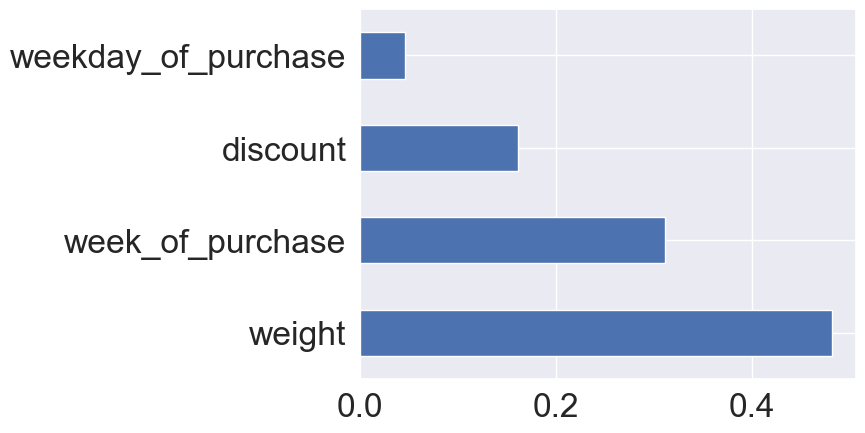

In [104]:
#features importance 
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(1000)
   .plot(kind='barh'))  

## Confusion Matrix

In [105]:
#Verificar a accuracy
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

clf = RandomForestClassifier().fit(X_train, y_train)
print('Accuracy of Random Forest classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Random Forest classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

C:\Users\olive\AppData\Local\Temp\ipykernel_26976\4197820095.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf = RandomForestClassifier().fit(X_train, y_train)


Accuracy of Random Forest classifier on training set: 1.00
Accuracy of Random Forest classifier on test set: 0.65


In [106]:
confusion_matrix(y_true=y_test, y_pred=y_predRF)

array([[570, 605],
       [  0, 754]], dtype=int64)

In [107]:
tn, fp, fn, tp =confusion_matrix(y_true=y_test, y_pred=y_predRF).ravel()

In [108]:
# accuracy = (tp + tn)  / (tn + fp + fn + tp)
(tp + tn)  / (tn + fp + fn + tp)

0.6863659927423535

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

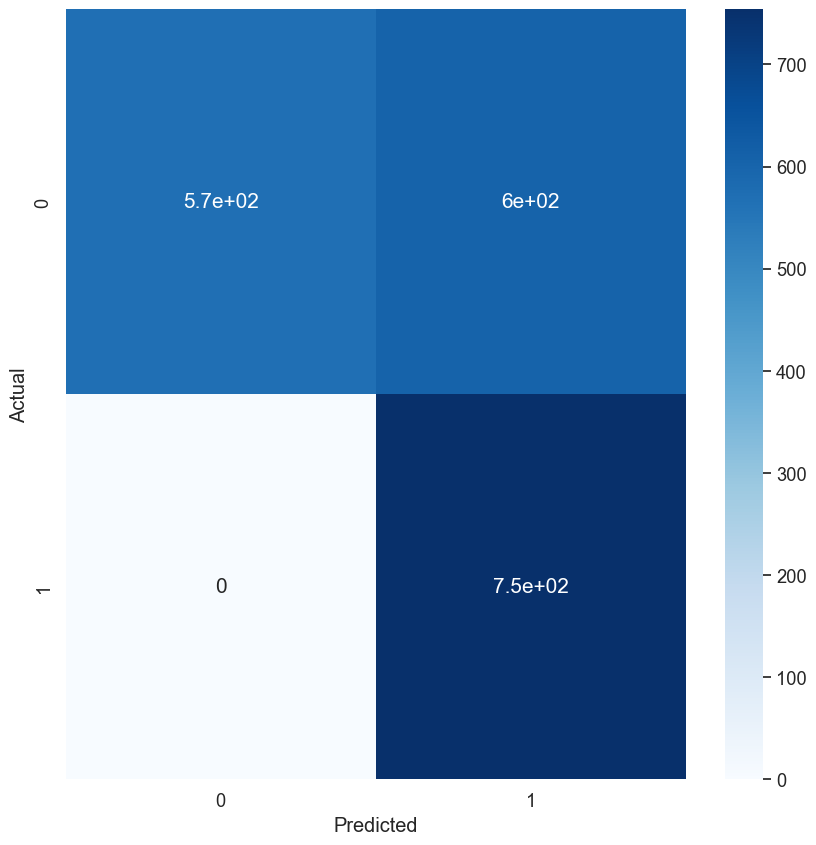

In [109]:
import seaborn as sn
#confusion matrix
data = confusion_matrix(y_test, y_predRF)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,10))
sn.set(font_scale=1.2)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 15})# font size

In [110]:
print(classification_report(y_test, y_predRF))

              precision    recall  f1-score   support

           0       1.00      0.49      0.65      1175
           1       0.55      1.00      0.71       754

    accuracy                           0.69      1929
   macro avg       0.78      0.74      0.68      1929
weighted avg       0.83      0.69      0.68      1929



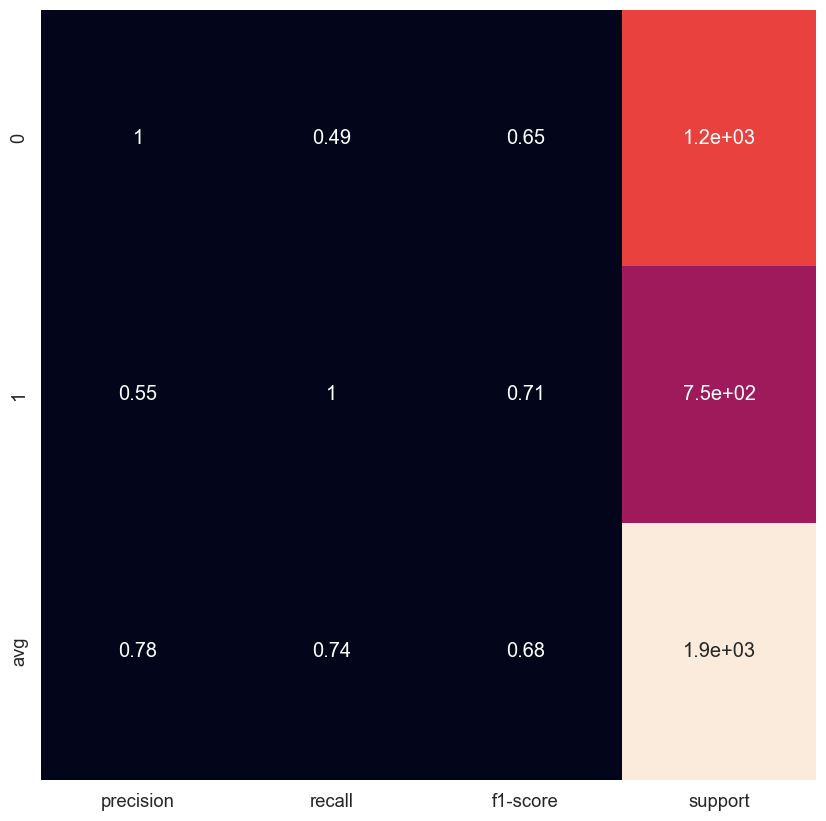

In [111]:
# gráfico com métricas de avaliação do modelo 
from sklearn.metrics import precision_recall_fscore_support
def plot_classification_report(y_test, y_predRF, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score', 'support']
    yticks = list(np.unique(y_test))
    yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_test, y_predRF)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep,
                annot=True, 
                cbar=False, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax)

plot_classification_report(y_test, y_predRF)

## K-Fold

In [112]:
k = 5
kf = KFold(n_splits=k, random_state=None)

In [113]:
y

,on_Time
0,0
1,0
2,0
3,0
4,0
...,...
9639,1
9640,1
9641,1
9642,0


In [114]:
acc_score = []
 
for train_index , test_index in kf.split(X):
    
    X_train_fold , X_test_fold = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train_fold , y_test_fold = y.iloc[train_index] , y.iloc[test_index]
     
    clf.fit(X_train_fold,y_train_fold)
    pred_values = clf.predict(X_test_fold)
     
    acc = accuracy_score(pred_values , y_test_fold)
    acc_score.append(acc)
     
avg_acc_score = sum(acc_score)/k

C:\Users\olive\AppData\Local\Temp\ipykernel_26976\3654060551.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_fold,y_train_fold)
C:\Users\olive\AppData\Local\Temp\ipykernel_26976\3654060551.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_fold,y_train_fold)
C:\Users\olive\AppData\Local\Temp\ipykernel_26976\3654060551.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train_fold,y_train_fold)
C:\Users\olive\AppData\Local\Temp\ipykernel_26976\3654060551.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
 

In [115]:
avg_acc_score

0.6475388748712059

## ROC Curve

In [116]:
# Let's also compute the ROC curve for the current model we have
from sklearn.metrics import roc_curve, auc

In [117]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_predRF, pos_label=1)

In [118]:
AUC = auc(fpr, tpr)

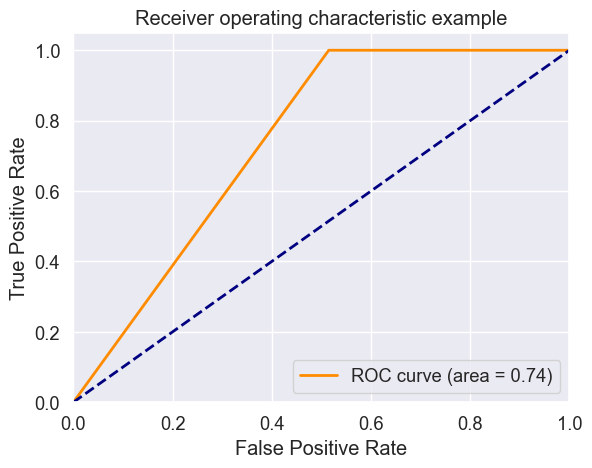

In [119]:
plt.figure()
lw = 2
plt.plot(
    fpr,
    tpr,
    color="darkorange",
    lw=lw,
    label="ROC curve (area = %0.2f)" % AUC,
)
plt.plot([0, 1], [0, 1], color="navy", lw=lw, linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic example")
plt.legend(loc="lower right")
plt.show()

# XG Boost

In [120]:
!pip install xgboost

In [121]:
import xgboost as xgb

In [122]:
from sklearn.datasets import make_classification 

In [123]:
X_train

,discount,weight,weekday_of_purchase,week_of_purchase
0,0.046875,0.921984,1.00,0.923077
1,0.218750,0.036007,1.00,0.230769
2,0.625000,0.027806,0.00,0.230769
3,0.062500,0.957992,0.50,0.615385
4,0.625000,0.594519,0.25,0.000000
...,...,...,...,...
7710,0.000000,0.808562,0.50,0.307692
7711,0.062500,0.711942,0.75,0.807692
7712,0.968750,0.077215,0.25,0.115385
7713,0.062500,0.673735,0.50,0.538462


In [124]:
y_train

,on_Time
9381,1
2571,0
2351,0
5723,1
112,0
...,...
2895,0
7813,0
905,0
5192,1


In [125]:
boost_model = xgb.XGBClassifier(n_jobs=1)

In [126]:
#treinar o modelo 
boost_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=1, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [127]:
#fazer previsões 
y_predXGB = boost_model.predict(X_test)

<AxesSubplot:>

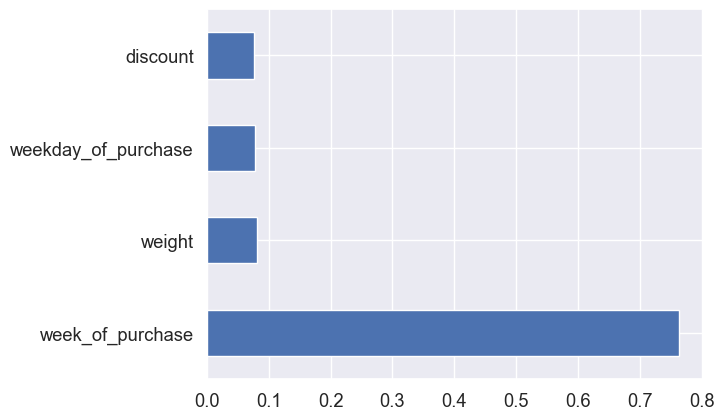

In [128]:
#features importance 

model = xgb.XGBClassifier(n_jobs=1)
model.fit(X_train, y_train)

(pd.Series(model.feature_importances_, index=X_train.columns)
   .nlargest(1000)
   .plot(kind='barh'))

### Confusion Matrix

In [129]:
confusion_matrix(y_true=y_test, y_pred=y_predXGB)

array([[768, 407],
       [258, 496]], dtype=int64)

In [130]:
confusion_matrix(y_true=y_test, y_pred=y_predXGB)

array([[768, 407],
       [258, 496]], dtype=int64)

In [131]:
# accuracy = (tp + tn)  / (tn + fp + fn + tp)
(tp + tn)  / (tn + fp + fn + tp)

0.6863659927423535

In [132]:
print(classification_report(y_test, y_predXGB))

              precision    recall  f1-score   support

           0       0.75      0.65      0.70      1175
           1       0.55      0.66      0.60       754

    accuracy                           0.66      1929
   macro avg       0.65      0.66      0.65      1929
weighted avg       0.67      0.66      0.66      1929



### K-Fold 

In [133]:
k = 5
kf = KFold(n_splits=k, random_state=None)

In [134]:
y

,on_Time
0,0
1,0
2,0
3,0
4,0
...,...
9639,1
9640,1
9641,1
9642,0


In [135]:
acc_score = []
for train_index , test_index in kf.split(X):
    
    X_train_fold , X_test_fold = X.iloc[train_index,:],X.iloc[test_index,:]
    y_train_fold , y_test_fold = y.iloc[train_index] , y.iloc[test_index]
    
    boost_model.fit(X_train_fold,y_train_fold)
    pred_values = boost_model.predict(X_test_fold)
    
    acc = accuracy_score(pred_values , y_test_fold)
    acc_score.append(acc)

avg_acc_score = sum(acc_score)/k

In [136]:
avg_acc_score

0.6567680672160451

### ROC Curve

In [137]:
# Let's also compute the ROC curve for the current model we have
from sklearn.metrics import roc_curve, auc

In [138]:
fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_predXGB, pos_label=1)

In [139]:
AUC = auc(fpr, tpr)

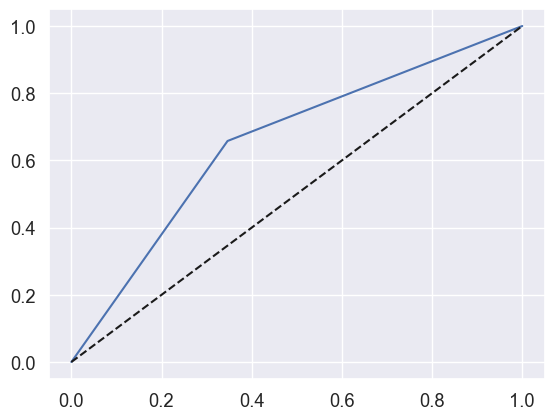

AUC: 0.6557209774817991


In [140]:
#gráfico para ver a curva ROC e a accuracy da RF

fpr, tpr, thresholds = roc_curve(y_true=y_test, y_score=y_predXGB, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.show() 


# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)

# Output para deployment

In [141]:
X

,discount,weight,weekday_of_purchase,week_of_purchase
0,39,2099,2,1
1,15,1354,2,1
2,8,1074,2,1
3,3,1403,2,1
4,19,2173,2,1
...,...,...,...,...
9639,3,4310,6,27
9640,3,5127,6,27
9641,3,5149,6,27
9642,6,5712,6,27


In [142]:
X.columns

Index(['discount', 'weight', 'weekday_of_purchase', 'week_of_purchase'], dtype='object')

In [143]:
#criar uma coluna índice 
X_test1['ID'] = range(len(X_test1))

In [144]:
#verificação 
X_test1

,discount,weight,weekday_of_purchase,week_of_purchase,on_Time,ID
229,49,2581,5,1,0,0
2835,4,1991,3,9,1,1
7773,2,5741,5,22,0,2
9450,10,5883,6,25,1,3
574,15,1956,3,3,0,4
...,...,...,...,...,...,...
7518,3,5866,4,21,0,1924
9359,2,5632,6,25,1,1925
9241,9,5136,5,25,1,1926
8254,10,1027,4,24,1,1927


In [145]:
#junção da coluna das previsões com Random Forest 
X_test1['y_predRF'] = y_predRF

In [146]:
#verificação 
X_test1

,discount,weight,weekday_of_purchase,week_of_purchase,on_Time,ID,y_predRF
229,49,2581,5,1,0,0,0
2835,4,1991,3,9,1,1,1
7773,2,5741,5,22,0,2,1
9450,10,5883,6,25,1,3,1
574,15,1956,3,3,0,4,0
...,...,...,...,...,...,...,...
7518,3,5866,4,21,0,1924,1
9359,2,5632,6,25,1,1925,1
9241,9,5136,5,25,1,1926,1
8254,10,1027,4,24,1,1927,1


In [147]:
#renomear 
predict_output = X_test1

In [148]:
#exportar para excel caso seja necessário para alguma aplicação 
predict_output.to_excel('predict_output.xlsx')

In [149]:
df['ID'] = range(len(df))

In [150]:
df

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time,ID
0,6,1,3,2,234,3,2,0,39,2099,2,1,0,0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0,1
2,6,1,3,3,135,3,1,0,8,1074,2,1,0,2
3,1,1,3,5,103,3,1,0,3,1403,2,1,0,3
4,2,1,3,5,257,3,2,1,19,2173,2,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1,9639
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1,9640
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1,9641
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0,9642


In [151]:
df_merged = pd.merge(df, predict_output[['ID', 'y_predRF']], on='ID', how='left')

O parâmetro how='left' garante que todas as linhas do conjunto de dados original sejam mantidas na mesclagem, mesmo que não haja uma correspondência na coluna de ID do conjunto de dados de previsão.

In [152]:
#verificação 
df_merged

,warehouse,shipment,number_customer_calls,customer_rating,product_cost,number_prior_purchases,product_importance,gender,discount,weight,weekday_of_purchase,week_of_purchase,on_Time,ID,y_predRF
0,6,1,3,2,234,3,2,0,39,2099,2,1,0,0,0.0
1,4,1,3,4,122,3,3,1,15,1354,2,1,0,1,1.0
2,6,1,3,3,135,3,1,0,8,1074,2,1,0,2,1.0
3,1,1,3,5,103,3,1,0,3,1403,2,1,0,3,1.0
4,2,1,3,5,257,3,2,1,19,2173,2,1,0,4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9639,1,3,4,1,204,3,2,0,3,4310,6,27,1,9639,NaN
9640,2,3,3,1,199,3,3,0,3,5127,6,27,1,9640,NaN
9641,3,3,3,4,216,3,1,1,3,5149,6,27,1,9641,NaN
9642,6,3,4,3,183,3,1,1,6,5712,6,27,0,9642,NaN


Infelizmente não consegui fazer o merge com o dataset original porque o ID bate com o index e não vai buscar as linhas que coincidem como anteriormente com o X_test que permite ver o índice original das linhas. 

# Conclusões

1. Criou-se um modelo com 3 algoritmos de supervised learning: Decision Tree, Random Forest e XGBoost. 
2. As features foram selecionadas com base na correlação com a target feature e foram 4: 'discount', 'weight', 'weekday of purchase' e 'week of purchase'.
3. O algoritmo que teve a melhor performance de previsão, com uma ROC Curve de 74% foi o Random Forest, motivo pelo qual foi selecionado. Uma ROC Curve de 74% já indica que temos um modelo de previsão razoável. 
3. As features mais importantes do Random Forest são: 1º 'weight'; 2º 'week of purchase', 3º 'discount' e por último 'weekday of purchase', o peso proporciona mais de 40% de informação ao modelo e a semana de compra cerca de 30%, enquanto o disco cerca de 20% e o dia semana da compra cerca de 0.5%. 